In [36]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [3]:
%autoreload 2  
%matplotlib inline

This notebook demonstrates the fitting of a 2D Gaussian random field

In [6]:
from __future__ import print_function
import numpy as np 
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
import george
from IPython.html.widgets import interact
from george.kernels import (ExpSquaredKernel) #,
                            # KappaKappaExpSquaredKernel)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [48]:
import sample_and_fit_gp as fit
import diag_plots as dplot

In [49]:
# np.random.seed(1)  # fix the random seed for reproducibility

# How the log marginal likelihood is computed

\begin{align}
 ln {\it L} = -0.5 [ \log(y^T K^{-1} y) + \log(|K|) + n \log (2\pi)]
\end{align}

where `K` is the kernel matrix, which has to be positive definite.
`y` is the dependent variable vector.

# Examine when `ExpSquaredKernel` becomes non-positive definite

# try using the true params to compute the marginal likelihood instead 

In [70]:
dplot.show_likelihood_surface(
        truth[0], truth[1], -np.log10(truth[2]), kernels,
        5, inv_lambda_grid_pts=20, beta_grid_pts=20,
        rng=(0, 1))

NameError: name 'truth' is not defined

In [ ]:
interact(show_likelihood_surface, inv_lambda=(0.7, 1.5, 0.1),
         beta=(0.1, 1., 0.1), noise_amp_negative_exp=(1, 12), 
         data_pt_nos=(10, 60), inv_lambda_grid_pts=(1, 61),
         beta_grid_pts=(1, 61), kernel_no=(0, 1))

In [8]:
def show_scatter_likelihood_surface(
        inv_lambda, beta, noise_amp_negative_exp, data_pt_nos):
    truth = (inv_lambda, beta)
    rng = (0, 1)
    noise_amp = pow(1, -noise_amp_negative_exp)
    coords, psi, psi_err = \
        sam.generate_2D_data(truth, data_pt_nos, ExpSquaredKernel, 
                             rng, noise_amp) 
    
    # initialize the param space to examine
    params = np.array([[p1, p2] 
          for p1 in np.linspace(0.5, 2.0, 20)
          for p2 in np.linspace(0.1, .5, 10)])

    likelihood_surface =[]
    for p in params:
        # print(p)
        gp = george.GP(p[0] * ExpSquaredKernel(p[1], ndim=2))
        gp.compute(coords, psi_err)
        likelihood_surface.append(gp.lnlikelihood(psi))

    plt.scatter(params[:, 0], params[:, 1], 
                c=likelihood_surface, s=200)
    plt.axvline(truth[0], color='r', lw=2, label='truth')
    plt.axhline(truth[1], color='r', lw=2)
    plt.colorbar()
    plt.title("lnlikelihood surface for ExpSqKernel", fontsize=15)
    plt.xlabel(r"$\lambda^{-1}$")
    plt.ylabel(r"$\beta$")
    plt.legend()

Kernel matrix is positive definite.


<function __main__.show_likelihood_surface>

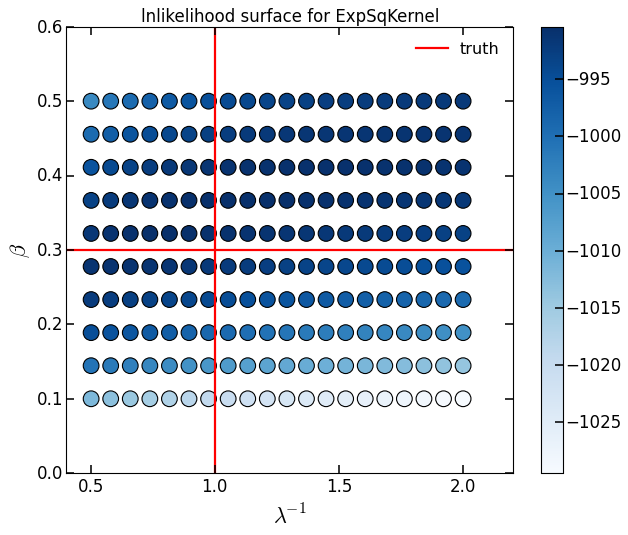

In [7]:
interact(show_scatter_likelihood_surface, inv_lambda=(0.6, 1.5, 0.1),
         beta=(0.1, .6, 0.1), noise_amp_negative_exp=(1, 12), 
         data_pt_nos=(10, 60))